$\newline$
$\newline$
<a name=''>$$\large{\bf{\text{Prject 3}}}$$</a>
$\newline$
$\newline$

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

$\newline$
$\newline$
<a name=''>$\color{green}{\large{\bf{\text{Problem 1:}}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- <a name=''>${{\bf{\text{Table of Contents}}}}$</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{PCA}}}}$](#1)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{T-SNE}}}}$](#2)</a>
$\newline$
$\newline$
- - - <a name=''>[${\small{\underline{\bf{\text{KL-Divergence for Convexity}}}}}$](#3)</a>
$\newline$
$\newline$
- - - <a name=''>[$\small{\underline{\bf{\text{Implementation}}}}$](#4)</a>
$\newline$
$\newline$
- - <a name=''>[${\small{\bf{\text{Conclusion}}}}$](#5)</a>
$\newline$
$\newline$

In [4]:
import os
import numpy as np
import pandas as pd
from time import time
from termcolor import colored
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as PCA_sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler

$\newline$
$\newline$
- <a name='1'>$\bf{\text{PCA}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name=''>$\small{\bf{\text{Data Loading}}}$</a>
$\newline$
$\newline$

In [3]:
path_str = os.getcwd()
data_name_str = 'Data_Problem_1/mnist_train.csv'
full_path_str = os.path.join(path_str, data_name_str)

In [4]:
data_df = pd.read_csv(full_path_str, header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = data_df.values
data_ndarray, labels_ndarray = data[:, 1:], data[:, 0]

In [6]:
print(f'\nShape of the Data: {colored(data_ndarray.shape, "blue", attrs=["bold"])}\n')
print(f'\n ... and its Data Type: {colored(data_ndarray.dtype, "blue", attrs=["bold"])}\n')
print(f'\n ... Min of Data: {colored(data_ndarray.min(), "blue", attrs=["bold"])}\n')
print(f'\n ... Max of Data: {colored(data_ndarray.max(), "blue", attrs=["bold"])}\n')


Shape of the Data: (60000, 784)


 ... and its Data Type: int64


 ... Min of Data: 0


 ... Max of Data: 255



In [7]:
classes_unique = np.unique(labels_ndarray)
print(f'\nShape of Labels: {colored(labels_ndarray.shape, "blue", attrs=["bold"])}\n')
print(f'\nUnique Values of Classes: {colored(classes_unique, "blue", attrs=["bold"])}\n')


Shape of Labels: (60000,)


Unique Values of Classes: [0 1 2 3 4 5 6 7 8 9]



$\newline$
$\newline$
- - <a name=''>$\small{\bf{\text{Covariance Matrix}}}$</a>
$\newline$
$\newline$

In [8]:
data_input = data_ndarray

In [9]:
cov_mat_ndarray = np.cov(data_input, rowvar=False)

In [10]:
print(f'\nShape of the Covariance Matrix: {colored(cov_mat_ndarray.shape, "blue", attrs=["bold"])}\n')


Shape of the Covariance Matrix: (784, 784)



In [11]:
symmetricity = np.unique(cov_mat_ndarray == cov_mat_ndarray.T)[0]
print(f'\nDoes Covariance Matrix is Symmetric: {colored(symmetricity, "blue", attrs=["bold"])}\n')


Does Covariance Matrix is Symmetric: True



In [12]:
eig_values, eig_vectors = np.linalg.eig(cov_mat_ndarray)
eig_values, eig_vectors = eig_values.real, eig_vectors.real
print(f'\nData type of the eigen values: {colored(eig_values.dtype, "blue", attrs=["bold"])}\n')
print(f'\nData type of the eigen vectors: {colored(eig_vectors.dtype, "blue", attrs=["bold"])}\n')


Data type of the eigen values: float64


Data type of the eigen vectors: float64



In [13]:
def sorted_n_biggest_eig_values(eig_values_ndarray: np.ndarray, n: int) -> np.ndarray:
    eig_values = eig_values_ndarray.copy()
    sorted_eig_values = np.sort(eig_values)
    sorted_eig_values_list = list(sorted_eig_values)
    sorted_eig_values_list.reverse()
    sorted_eig_values_up_to_down = np.array(sorted_eig_values_list)
    selected_eig_values = sorted_eig_values_up_to_down[: n]
    return selected_eig_values

In [14]:
def select_eig_vectors(eig_values: np.ndarray, \
                       eig_vectors: np.ndarray, n: int) -> np.ndarray:
    
    selected_eig_values = sorted_n_biggest_eig_values(eig_values, n)
    m, d = eig_vectors.shape[0], selected_eig_values.shape[0]
#     print(m)
    selected_eig_vectors = np.zeros((m, d), dtype=np.float64)
    for i, eig_val in enumerate(selected_eig_values):
        selected_eig_vectors[:, i] = eig_vectors[:, eig_values == eig_val].reshape((m, ))
        
    return selected_eig_vectors

$\newline$
$\newline$
- - [ ] <a name=''>$\small{\bf{\text{Test:}}}$</a>
$\newline$
$\newline$

In [15]:
data_input = data_ndarray

In [16]:
n_components = 50

In [17]:
selected_eig_vectors = select_eig_vectors(eig_values, eig_vectors,n_components)

In [18]:
print(f'\nShape of Selected Eigen Vectors: {colored(selected_eig_vectors.shape, "blue", attrs=["bold"])}\n')
print(f'\n ... and its Data type: {colored(selected_eig_vectors.dtype, "blue", attrs=["bold"])}\n')


Shape of Selected Eigen Vectors: (784, 50)


 ... and its Data type: float64



$\newline$
$\newline$
- - [x] <a name=''>$\small{\bf{\text{End of the Test}}}$</a>
$\newline$
$\newline$

In [19]:
def PCA(data_ndarray: np.ndarray, n_components: int) -> np.ndarray:
    data = data_ndarray.copy()
    cov_mat = np.cov(data, rowvar=False, )
    
    eig_values, eig_vectors = np.linalg.eig(cov_mat)
    eig_values, eig_vectors = eig_values.real, eig_vectors.real
    
    selected_eig_vectors = select_eig_vectors(eig_values, eig_vectors, n_components)
    
    data_reduced = data @ selected_eig_vectors
    return data_reduced

$\newline$
$\newline$
- - [ ] <a name=''>$\small{\bf{\text{Test for PCA:}}}$</a>
$\newline$
$\newline$

In [20]:
data_input = data_ndarray

In [21]:
pca = PCA_sk(n_components=n_components)

In [22]:
tic = time()
data_reduced_by_sklearn = pca.fit_transform(data_input)
toc = time()
run_time_for_sk_method = toc - tic
print(f'\n{colored("Run time", "green", attrs=["bold"])} for Scikit-Learn Method: \
{run_time_for_sk_method: 0.3f}(s)\n')


Run time for Scikit-Learn Method:  5.552(s)



In [23]:
tic = time()
data_reduced_by_my_pca = PCA(data_input, n_components=n_components)
toc = time()
run_time_for_my_method = toc - tic
print(f'\n{colored("Run time", "green", attrs=["bold"])} for My Method: {run_time_for_my_method: 0.3f}(s)\n')


Run time for My Method:  1.464(s)



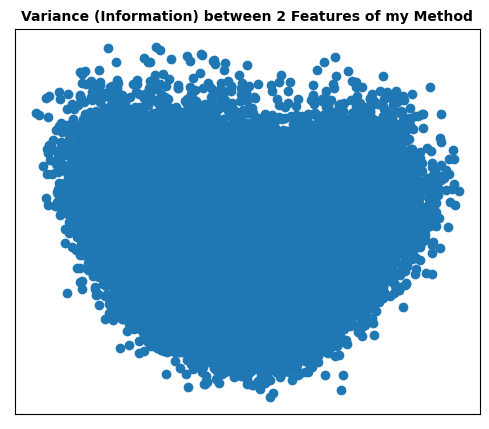

In [27]:
print(f'\n\n\n')
plt.figure(1, figsize=(6, 5))
plt.scatter(data_reduced_by_my_pca[:, 2], data_reduced_by_my_pca[:, 10]), plt.xticks([]), plt.yticks([])
plt.title('Variance (Information) between 2 Features of my Method', fontsize=10, fontweight='bold')
plt.show()
print(f'\n\n\n')

In [28]:
print(f'\n{colored("Variance", "blue", attrs=["bold"])} of Second Feature in my Method: \
{colored(data_reduced_by_my_pca[:, 2].var(), "blue", attrs=["bold"])}\n')


Variance of Second Feature in my Method: 211503.84193548342



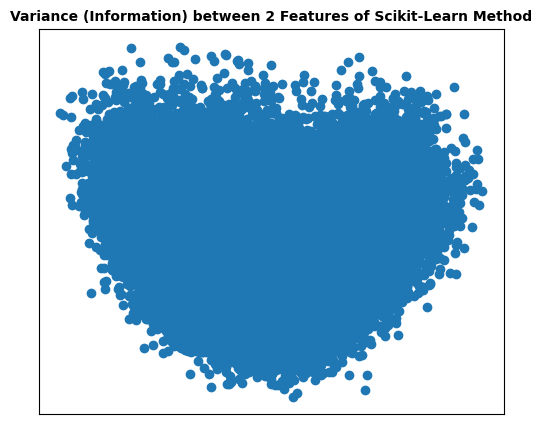

In [29]:
print(f'\n\n\n')
plt.figure(1, figsize=(6, 5))
plt.scatter(data_reduced_by_sklearn[:, 2], data_reduced_by_sklearn[:, 10]), plt.xticks([]), plt.yticks([])
plt.title('Variance (Information) between 2 Features of Scikit-Learn Method', \
          fontsize=10, fontweight='bold')
plt.show()
print(f'\n\n\n')

In [30]:
print(f'\n{colored("Variance", "blue", attrs=["bold"])} of Second Feature in my Method: \
{colored(data_reduced_by_sklearn[:, 2].var(), "blue", attrs=["bold"])}\n')


Variance of Second Feature in my Method: 211503.84193548321



$\newline$
$\newline$
- - [x] <a name=''>$\small{\bf{\text{End of the Test for PCA}}}$</a>
$\newline$
$\newline$

In [31]:
data_input = data_reduced_by_my_pca

$\newline$
$\newline$
- <a name='2'>$\bf{\text{T-SNE}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name='3'>$\small{\bf{\text{KL-Divergence for Convexity}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
> $\small{\bf{\color{red}{\text{Note:}}}}$
$\newline$
$\newline$

$\newline$
$\newline$
- $\large{\bf{p_{ij}\;=\;\frac{\;\;\;e^{-\;\frac{||x_{i}\;-\;x_{j}||_{2}^{2}}{2\sigma^{2}}}\;\;\;}{\;\;\;\sum_{k\neq l}\;e^{-\;\frac{||x_{k}\;-\;x_{l}||_{2}^{2}}{2\sigma^{2}}}\;\;\;}}}$
$\newline$
$\newline$
$\newline$
$\newline$
- $\large{\bf{q_{ij}\;=\;\large{\frac{\;\;\;\;\frac{1}{1\;+\;||y_{i} \;-\; y_{j}||_{2}^{2}}\;\;\;\;}{\;\;\; \sum_{k\neq i} \frac{1}{1\;+\;||y_{i}\; -\; y_{k}||_{2}^{2}}\;\;\;}}}}$
$\newline$
$\newline$
$\newline$
$\newline$
- $\large{\bf{J\;=\;\sum_{i}\sum_{j} \; p_{ij} \times log_{2}(p_{ij})\;-\;q_{ij} \times log_{2}(q_{ij})}}$
$\newline$
$\newline$
$\newline$
$\newline$
- $\large{\bf{J_{convex}\;=\;\sum_{i, j} \; p_{ij} \times log_{2}(\frac{p_{ij}}{q_{ij}})}}$
$\newline$
$\newline$
$\newline$
$\newline$
- $\large{\bf{\frac{\partial{J}}{\partial{y_{i}}}\;=\;4 \times \sum_{j} \; (p_{ij}\;-\;q_{ij}) \times (y_{i}\;-\;y_{j}) \times (\frac{1}{1\;+\;||y_{i}\;-\;y_{j}||_{2}^{2}})}}$
$\newline$
$\newline$
$\newline$
$\newline$
- $\large{\bf{y_{i}\;:=\;y_{i}\;-\;\alpha\;\frac{\partial{J}}{\partial{y_{i}}}}}$
$\newline$
$\newline$
$\newline$
$\newline$

$\newline$
$\newline$
- - - <a name=''>$\small{\bf{\text{Plot}}}$</a>
$\newline$
$\newline$

In [32]:
min_max_scaler = MinMaxScaler()

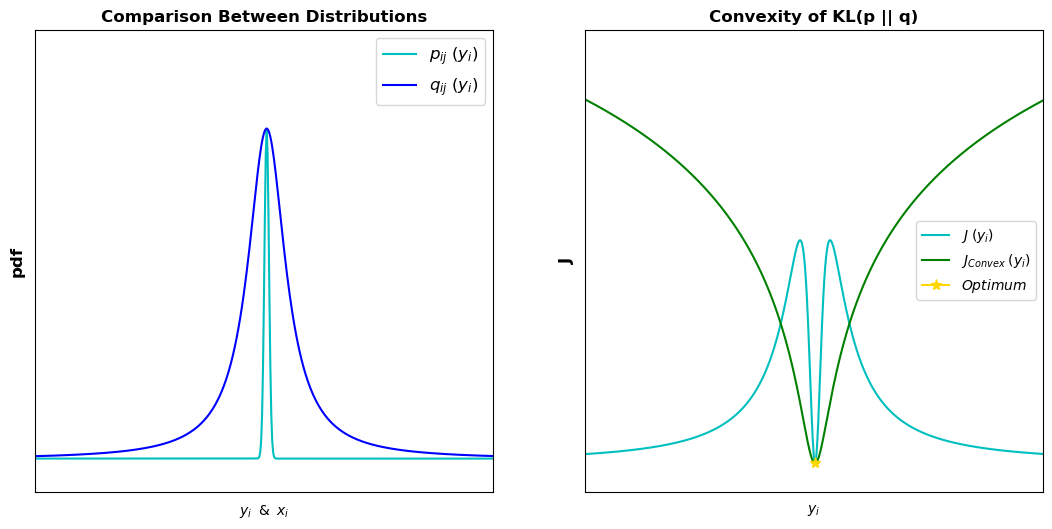

In [33]:
y_j = 0.1
y_i = np.linspace(-20, 20, 1000)
sigma = 0.1
p_ij = np.exp(-(np.abs(y_i - y_j) ** 2)/(2 * (sigma ** 2)))
p_ij = p_ij.reshape((p_ij.shape[0], 1))
p_ij_normal = min_max_scaler.fit_transform(p_ij)

q_ij = 1/(1 + (np.abs(y_i - y_j) ** 2))
q_ij = q_ij.reshape((q_ij.shape[0], 1))
q_ij_normal = min_max_scaler.fit_transform(q_ij)
P_IJ = 0.1
J = (P_IJ * np.log2(P_IJ)) - (q_ij * np.log2(q_ij))
J_convex = P_IJ * np.log2(P_IJ / q_ij)

print(f'\n\n\n\n')
plt.figure(1, figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.plot(y_i, p_ij_normal, label='$p_{ij}\;(y_{i})$', c='c')
plt.plot(y_i, q_ij_normal, label='$q_{ij}\;(y_{i})$', c='b')
plt.xlim([-10, 10]), plt.ylim([-0.1, 1.3]), plt.xticks([]), plt.yticks([]), \
plt.xlabel('$y_{i}\;\;&\;\;x_{i}\;$', fontweight='bold', fontsize=10), \
plt.title('Comparison Between Distributions', fontsize=12, fontweight='bold'), \
plt.ylabel('pdf', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(y_i, J, label='$J\;(y_{i})$', c='c')
plt.plot(y_i, J_convex, label='$J_{Convex}\;(y_{i})$', c='g')
plt.plot(y_i[J_convex.ravel() == J_convex.min()], J_convex.min(), marker='*', \
            c='gold', label='$Optimum$', markersize=8)
plt.ylabel('J', fontweight='bold', fontsize=12), plt.xlabel('$y_{i}$', fontweight='bold', fontsize=10)
plt.legend(fontsize=10), plt.xticks([]), plt.yticks([])
plt.xlim([-20, 20]), plt.ylim([-0.4, 0.7]), plt.title('Convexity of KL(p || q)', fontweight="bold", \
                                                      fontsize=12)
plt.show()
print(f'\n\n\n\n')

$\newline$
$\newline$
- - <a name='4'>$\small{\bf{\text{Implemintation}}}$</a>
$\newline$
$\newline$

In [34]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [155]:
NUM_SAMPLES = 20
data_input, labels_input = data_reduced_by_my_pca[: NUM_SAMPLES], labels_ndarray[: NUM_SAMPLES]

In [156]:
standard_scaler = StandardScaler()

In [157]:
data_scaled = standard_scaler.fit_transform(data_input)

In [158]:
print(f'\n{colored("Shape", "blue", attrs=["bold"])} of the Input Data: \
{colored(data_scaled.shape, "blue", attrs=["bold"])}\n')
print(f'\n{colored("Shape", "blue", attrs=["bold"])} of Labels: \
{colored(labels_input.shape, "blue", attrs=["bold"])}\n')
print(f'\n{colored("Mean of Second Feature", "blue", attrs=["bold"])} of Scaled Data: \
{data_scaled.mean(): 0.3f}\n')
print(f'\n{colored("Variance of Second Feature", "blue", attrs=["bold"])} of Scaled Data: \
{data_scaled.var(): 0.3f}\n')


Shape of the Input Data: (20, 50)


Shape of Labels: (20,)


Mean of Second Feature of Scaled Data:  0.000


Variance of Second Feature of Scaled Data:  1.000



In [159]:
print(f'\nUnique Values of Input Labels: {colored(np.unique(labels_input), "blue", attrs=["bold"])}\n')


Unique Values of Input Labels: [0 1 2 3 4 5 6 7 8 9]



In [294]:
data_input = data_scaled
print(f'\nShape of {colored("High Dimension Data(X)", "blue", attrs=["bold"])}: \
{colored(data_input.shape, "blue", attrs=["bold"])}\n')


Shape of High Dimension Data(X): (20, 50)



$\newline$
$\newline$
- - - <a name=''>$\small{\bf{\text{My Method}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - - - <a name=''>$\small{\bf{\text{Hyperparameter Tuning}}}$</a>
$\newline$
$\newline$

In [302]:
PERPLEXITY = 11
g_kernel = 7
EPOCHS = 2000
LR = 1e1
MOMENTUM = 0.99

In [309]:

def getKey(item):
    
    return item[1]

#compute the distance between the neighboors of x1 and return a list of the k neghboors
#where k is the complexity
def k_neighbours(x,x1_index,p_or_q='p'):
    
    x1 = x[x1_index]
    list_k_neighbours = []
    for i in range(x.shape[0]):
        
        if i != x1_index:
            
            xi = x[i]
            if p_or_q == 'p':
                distance = np.exp(-np.linalg.norm(x1 - xi) ** 2 / (2 * g_kernel ** 2))
            else:
                distance = (1 + np.linalg.norm(x1 - xi) ** 2) ** - 1
            list_k_neighbours.append([i, distance])
    
    list_k_neighbours = sorted(list_k_neighbours, key = getKey)
    
    return list_k_neighbours[: PERPLEXITY]

#compute the similarity pij between two xi, xj in the original space
#divide the distance between xi, xj by the sum of the distances of the k_neightbours where k is the complexity
def compute_pij(x,x1_index,x2_index):
    
    x1 = x[x1_index]
    x2 = x[x2_index]
    # num=(1+np.linalg.norm(x1-x2)**2)**(-1)/(2*g_kernel**2))
    num = np.exp(-np.linalg.norm(x1 - x2) ** 2) / (2 * g_kernel ** 2)
    denom = 0
    list_k_neighbours=k_neighbours(x, x1_index,'p')
    for i in list_k_neighbours:
        
        denom += i[1]
        
    return num/denom


#compute the table p of the xij in the original space
def compute_p(x):
    
    table = np.zeros((x.shape[0], x.shape[0]))
    for i in range(x.shape[0]):
        
        for j in range(x.shape[0]):
            
            if i != j:
                
                pij = compute_pij(x, i, j)
                pji = compute_pij(x, j, i)
                table[i, j] = (pij + pji) / (2 * x.shape[0])
                # table[i,j]=pij
    return table

#compute the similarity qij between two yi,yj in the new space
#divide the distance between yi,yj by the sum of the distances of the k_neightbours where k is the complexity
def compute_qij(y, y1_index, y2_index):
    
    y1 = y[y1_index]
    y2 = y[y2_index]
    num = (1 + np.linalg.norm(y1 - y2) ** 2) ** (-1)
    denom = 0
    for i in k_neighbours(y, y1_index, 'q'):
        denom += i[1]
        
    return num/denom

#compute the table q of the yij in the new space
def compute_q(y):
    
    table = np.zeros((y.shape[0], y.shape[0]))
    for i in range(y.shape[0]):
        for j in range(y.shape[0]):
            if i != j:
                qij = compute_qij(y,i,j)
                table[i,j] = qij
                
    return table

#compute the erros between the 2 distributions using the KL-divergence
def kl_divergence(p, q):
    
    total = 0
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            if q[i,j] != 0 and p[i,j] != 0:
                total += p[i,j] * np.log(p[i,j] / q[i,j])
                
    return total

#apply gradient descent to lower the KL-divergence
#added momentum increase the speed
def gradient_descent(p, q, y):
    
    history = np.zeros((p.shape[0], 2, y.shape[1]))
    for iter in range(EPOCHS):
        
        for i in range(y.shape[0]):
            
            sum_value = 0
            for j in range(y.shape[0]):
                
                sum_value += ((y[i] - y[j]) * (p[i,j] - q[i,j]) * (1 + np.linalg.norm(y[i] - y[j] ** 2)) ** -1)
            y[i] -= 4 * LR * sum_value + MOMENTUM * (history[i, 1] - history[i, 0])
            history[i, 0] = history[i, 1]
            history[i, 1] = y[i]
        if iter%100 == 0:
            
            q = compute_q(y)
            print(f'\n{colored("Epoch", "blue", attrs=["bold"])} {colored(iter + 100, "blue", attrs=["bold"])}: {kl_divergence(p, q)}') 
    y -= np.mean(y)
    y /= np.std(y)
    return y


def main(data_input_ndarray: np.ndarray, n_components: int=2):
    #I choose a dataset with two well separated part
#     x = np.random.rand(10, 3)
#     x = np.tile(x, (2, 1))
#     x[:10] *= 0.1
#     color = ['blue'] * 10 + ['red'] * 10

#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(x[:,0],x[:,1],x[:,2],color=color)
#     plt.show()
    
#     n_components = 2
#     x = data_classes_dict[str(class_num)]
    x = data_input_ndarray

    table_p = compute_p(x)

    #Probably not the right way to initialize the new space y
    np.random.seed(0)
    y_init = 1e-4 * np.random.randn(x.shape[1], n_components)
#     y = y_init
    y = x.dot(y_init)
    y -= np.mean(y)
    y /= np.std(y)
    table_q = compute_q(y)
    y = gradient_descent(table_p, table_q, y)
    
    

    return y

In [310]:
y = main(data_input_ndarray=data_input, n_components=2)


Epoch 100: -8.593078717299232e-12

Epoch 200: -7.92249021729498e-12

Epoch 300: -8.12050925393079e-12

Epoch 400: -8.05763690022978e-12

Epoch 500: -8.023207624857539e-12

Epoch 600: -8.002051568382394e-12

Epoch 700: -7.990456501838291e-12

Epoch 800: -7.982177768373612e-12

Epoch 900: -7.97530138842139e-12

Epoch 1000: -7.969549276481175e-12

Epoch 1100: -7.964670917077027e-12

Epoch 1200: -7.96048468391454e-12

Epoch 1300: -7.956855533140676e-12

Epoch 1400: -7.953681262384034e-12

Epoch 1500: -7.950884534163873e-12

Epoch 1600: -7.948405374470685e-12

Epoch 1700: -7.9461954381133e-12

Epoch 1800: -7.944214295831246e-12

Epoch 1900: -7.942428875011924e-12

Epoch 2000: -7.940812110302191e-12


In [299]:
print(f'\nShape of {colored("Low Dimension Data(y)", "blue", attrs=["bold"])}: \
{colored(y.shape, "blue", attrs=["bold"])}\n')


Shape of Low Dimension Data(y): (20, 2)



$\newline$
$\newline$
- - - - <a name=''>$\small{\bf{\text{Plot}}}$</a>
$\newline$
$\newline$

In [311]:
NUM_CLASSES = 10
class_boolean_data = {}
for i in range(NUM_CLASSES):
    class_boolean_data[str(i)] = (labels_input == i)
    
    
data_classes_dict = {}
for i in range(NUM_CLASSES):
    data_classes_dict[str(i)] = (y[class_boolean_data[str(i)]])

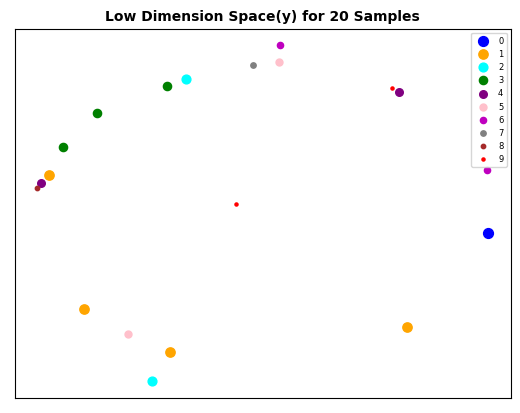

In [312]:
color_list = ['blue', 'orange', 'cyan', 'green', 'purple', 'pink', 'm', 'gray', 'brown', 'red']
marker_size = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5]
for c in range(NUM_CLASSES):
    
    plt.scatter(data_classes_dict[str(c)][:, 0], data_classes_dict[str(c)][:, 1], \
                color=color_list[c], label=c, s=marker_size[c]), plt.xticks([]), plt.yticks([])
    plt.legend(fontsize=6)

print(f'\n\n')
plt.title(f'Low Dimension Space(y) for {NUM_SAMPLES} Samples', fontweight="bold", fontsize=10)
plt.show()
print(f'\n\n\n')

$\newline$
$\newline$
- - - <a name=''>$\small{\bf{\text{Scikit-Learn Method}}}$</a>
$\newline$
$\newline$

In [181]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)

In [182]:
y = tsne.fit_transform(data_input)

In [292]:
print(f'\nShape of {colored("Low Dimension Data(y)", "blue", attrs=["bold"])}: \
{colored(y.shape, "blue", attrs=["bold"])}\n')


Shape of Low Dimension Data(y): (20, 2)



$\newline$
$\newline$
- - - - <a name=''>$\small{\bf{\text{Plot}}}$</a>
$\newline$
$\newline$

In [183]:
NUM_CLASSES = 10
class_boolean_data = {}
for i in range(NUM_CLASSES):
    class_boolean_data[str(i)] = (labels_input == i)
    
    
data_classes_dict = {}
for i in range(NUM_CLASSES):
    data_classes_dict[str(i)] = (y[class_boolean_data[str(i)]])

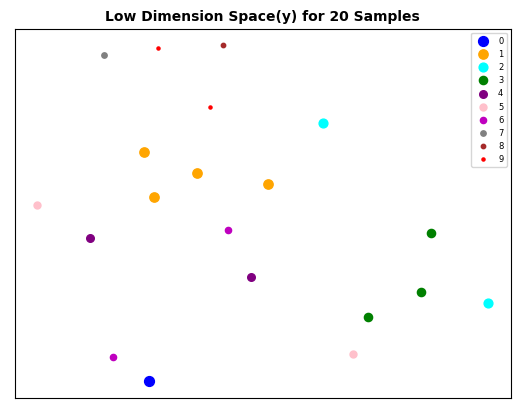

In [189]:
color_list = ['blue', 'orange', 'cyan', 'green', 'purple', 'pink', 'm', 'gray', 'brown', 'red']
marker_size = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5]
for c in range(NUM_CLASSES):
    
    plt.scatter(data_classes_dict[str(c)][:, 0], data_classes_dict[str(c)][:, 1], \
                color=color_list[c], label=c, s=marker_size[c]), plt.xticks([]), plt.yticks([])
    plt.legend(fontsize=6)

print(f'\n\n')
plt.title(f'Low Dimension Space(y) for {NUM_SAMPLES} Samples', \
          fontweight="bold", fontsize=10)
plt.show()
print(f'\n\n\n')

$\newline$
$\newline$
- <a name='5'>$\small{\bf{\text{Conclusion:}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - $\text{Although the T-SNE method seems to be a good method for plotting the data, but due to we need the variance of the data for}\\ \text{  classification, and since PCA is a variance-based method, then as long as norm_2 is used as the criterion of similarity } \\ \text{(or dissimilarity), and considering the ability of PCA for noise filtering, I think that classification by using PCA  is a better } \\ \text{method in real-world problems.}$
$\newline$
$\newline$

$\newline$
$\newline$
<a name=''>$\color{green}{\large{\bf{\text{Problem 2:}}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- <a name=''>${{\bf{\text{Table of Contents}}}}$</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Viewing Some Images}}}}$](#6)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Data Splitting into Train Data & Validation Data}}}}$](#7)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Preparing Our Labels(One-Hot Encoding)}}}}$](#8)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Max Scaling}}}}$](#9)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Data Augmentation}}}}$](#10)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Reduce learning rate when a metric has stopped improving (for Automating the Learning Rate Parameter }}}}$](#11)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Preparing VGG19 Model}}}}$](#12)</a>
$\newline$
$\newline$
- - - <a name=''>[$\small{\underline{\bf{\text{For Non-Trainability of VGG Params}}}}$](#13)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Adding Fully Connected Layers to VGG19 for Creating a Sequential Model}}}}$](#14)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Defining Optimizer: Adam & SGD}}}}$](#15)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Backpropagation(Fitting or in this case Fine-Tuning)}}}}$](#16)</a>
$\newline$
$\newline$
- - - <a name=''>[$\small{\underline{\bf{\text{Result of Adam Optimizer}}}}$](#17)</a>
$\newline$
$\newline$
- - - <a name=''>[$\small{\underline{\bf{\text{Result of Adam + SGD Optimizer}}}}$](#18)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Test}}}}$](#19)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Confusion Matrix}}}}$](#20)</a>
$\newline$
$\newline$
- - <a name=''>[$\small{\underline{\bf{\text{Conclusion}}}}$](#21)</a>
$\newline$
$\newline$

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout

$\newline$
$\newline$
- <a name='6'>$\small{\bf{\text{Viewing Some Images}}}$</a>
$\newline$
$\newline$

In [5]:
(X_train, y_train_pre), (X_test,y_test_pre) = cifar10.load_data()

In [6]:
unique_values_y_train = np.unique(y_train_pre)
unique_values_y_test = np.unique(y_test_pre)

In [7]:
print(f'\nShape of {colored("X_train", "blue", attrs=["bold"])}: \
{colored(X_train.shape, "blue", attrs=["bold"])}')
print(f'\nShape of {colored("y_train", "blue", attrs=["bold"])}: \
{colored(y_train_pre.shape, "blue", attrs=["bold"])}')
print(f'\nUnique Values of {colored("y_train", "green", attrs=["bold"])}: \
{colored(unique_values_y_train, "green", attrs=["bold"])}\n')
print(f'\nShape of {colored("x_test", "blue", attrs=["bold"])}: \
{colored(X_test.shape, "blue", attrs=["bold"])}')
print(f'\nShape of {colored("y_test", "blue", attrs=["bold"])}: \
{colored(y_test_pre.shape, "blue", attrs=["bold"])}')
print(f'\nUnique Values of {colored("y_test", "green", attrs=["bold"])}: \
{colored(unique_values_y_test, "green", attrs=["bold"])}\n')


Shape of X_train: (50000, 32, 32, 3)

Shape of y_train: (50000, 1)

Unique Values of y_train: [0 1 2 3 4 5 6 7 8 9]


Shape of x_test: (10000, 32, 32, 3)

Shape of y_test: (10000, 1)

Unique Values of y_test: [0 1 2 3 4 5 6 7 8 9]



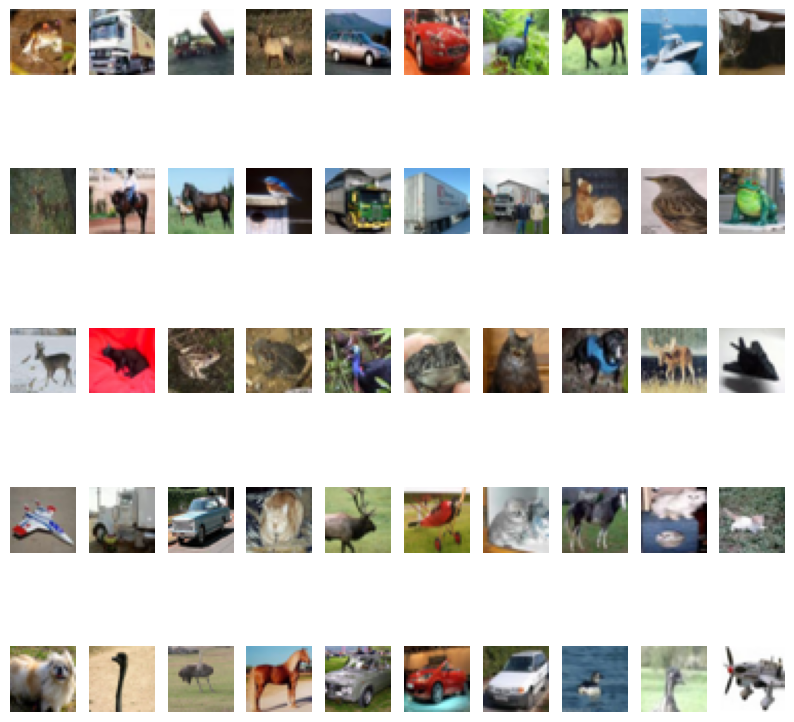

In [8]:
print(f'\n\n\n\n')
plt.figure(figsize=(10, 10))
for i in range(50):
    
    plt.subplot(5, 10, 1+i), plt.axis('off'), plt.imshow(X_train[i], cmap='gray')
plt.show()    
print(f'\n\n\n\n')

$\newline$
$\newline$
- <a name='7'>$\bf{\text{Data Splitting into Train Data(80%) & Validation Data(20%)}}$</a>
$\newline$
$\newline$

In [9]:
x_test, y_test = X_test, y_test_pre

In [10]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train_pre, test_size=0.2, random_state=0)

In [11]:
print(f'\nShape of {colored("x_train", "blue", attrs=["bold"])}: \
{colored(x_train.shape, "blue", attrs=["bold"])}')
print(f'\nShape of {colored("y_train", "blue", attrs=["bold"])}: \
{colored(y_train.shape, "blue", attrs=["bold"])}\n')
print(f'\nShape of {colored("x_val", "blue", attrs=["bold"])}: \
{colored(x_val.shape, "blue", attrs=["bold"])}')
print(f'\nShape of {colored("y_val", "blue", attrs=["bold"])}: \
{colored(y_val.shape, "blue", attrs=["bold"])}\n')


Shape of x_train: (40000, 32, 32, 3)

Shape of y_train: (40000, 1)


Shape of x_val: (10000, 32, 32, 3)

Shape of y_val: (10000, 1)



$\newline$
$\newline$
- <a name='8'>$\small{\bf{\text{Preparing Our Labels(}}}$[$\small{\underline{\bf{\text{One-Hot Encoding}}}})$](https://en.wikipedia.org/wiki/One-hot)</a>
$\newline$
$\newline$

In [15]:
y_train_OH, y_test_OH, y_val_OH = to_categorical(y_train, num_classes=10), \
to_categorical(y_test, num_classes=10), to_categorical(y_val, num_classes=10)

In [16]:
print(f'\nShape of OH-Encoded {colored("y_train", "blue", attrs=["bold"])}: \
{colored(y_train_OH.shape, "blue", attrs=["bold"])}')
print(f'\nShape of OH-Encoded {colored("y_test", "blue", attrs=["bold"])}: \
{colored(y_test_OH.shape, "blue", attrs=["bold"])}')
print(f'\nShape of OH-Encoded {colored("y_val", "blue", attrs=["bold"])}: \
{colored(y_val_OH.shape, "blue", attrs=["bold"])}\n')


Shape of OH-Encoded y_train: (40000, 10)

Shape of OH-Encoded y_test: (10000, 10)

Shape of OH-Encoded y_val: (10000, 10)



In [17]:
print(f'\nFirst Label of {colored("y_train", "blue", attrs=["bold"])}: \
{colored(y_train[0], "blue", attrs=["bold"])}\n')
print(f'\nFirst Label of {colored("One-Hot Encoded y_train", "blue", attrs=["bold"])}: \
{colored(y_train_OH[0], "blue", attrs=["bold"])}\n')


First Label of y_train: [3]


First Label of One-Hot Encoded y_train: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]



$\newline$
$\newline$
- <a name='9'>$\small{\bf{\text{Max Scaling}}}$</a>
$\newline$
$\newline$

In [18]:
y_train_scaled, y_test_scaled, y_val_scaled = y_train_OH, y_test_OH, y_val_OH

In [19]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
x_val_scaled = x_val / 255

In [20]:
print(f'\nMin of {colored("x_train_scaled", "blue", attrs=["bold"])}: {x_train_scaled.min()}, \
and Max of it: {x_train_scaled.max()} and its Data Type: \
{colored(x_train_scaled.dtype, "blue", attrs=["bold"])}')
print(f'\nMin of {colored("x_val_scaled", "blue", attrs=["bold"])}: {x_val_scaled.min()}, \
and Max of it: {x_val_scaled.max()} and its Data Type: {colored(x_val_scaled.dtype, "blue", attrs=["bold"])}')
print(f'\nMin of {colored("x_test_scaled", "blue", attrs=["bold"])}: {x_test_scaled.min()}, \
and Max of it: {x_test_scaled.max()} and its Data Type: \
{colored(x_test_scaled.dtype, "blue", attrs=["bold"])}\n')


Min of x_train_scaled: 0.0, and Max of it: 1.0 and its Data Type: float64

Min of x_val_scaled: 0.0, and Max of it: 1.0 and its Data Type: float64

Min of x_test_scaled: 0.0, and Max of it: 1.0 and its Data Type: float64



$\newline$
$\newline$
- <a name='10'>$\small{\bf{\text{Data Augmentation}}}$</a>
$\newline$
$\newline$

In [21]:
train_datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1,\
                                   height_shift_range=0.1, shear_range = 0.1, horizontal_flip=True,  \
                                   vertical_flip=False)

In [22]:
train_datagen.fit(x_train_scaled)

$\newline$
$\newline$
- - <a name='11'>$\small{\bf{\text{Reduce learning rate when a metric has stopped improving (for Automating the Learning Rate Parameter }\alpha)}}$</a>
$\newline$
$\newline$

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.6, \
                                            min_lr=0.00001)

$\newline$
$\newline$
- <a name='12'>$\small{\bf{\text{Preparing VGG19 Model}}}$</a>
$\newline$
$\newline$
> <a name=''>[$\small{\bf{\underline{\text{Transfer Learning @ Keras}}:}}$](https://keras.io/guides/transfer_learning/) </a> ${\color{black}{\text{ In this section we are going to prepare pre trained VGG19 model}}}$
$\newline$
$\newline$

In [24]:
input_size = x_train_scaled.shape[1:]

In [25]:
path_str = os.getcwd()
weights_name_str = 'vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
path_weights_str = os.path.join(weights_name_str)

In [27]:
# include_top=False: Do not include the ImageNet classifier at the top.
vgg_model = VGG19(include_top=False, weights=None, input_shape=input_size, classes=10)


# weights='imagenet': Load weights pre-trained on ImageNet.
vgg_model.load_weights(path_weights_str)

In [28]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

$\newline$
$\newline$
- - <a name='13'>${\bf{\text{For Non-Trainability of VGG Params}}}$</a>
$\newline$
$\newline$

In [29]:
for vgg_layer in vgg_model.layers:
    vgg_layer.trainable = False

In [30]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

$\newline$
$\newline$
- <a name='14'>$\small{\bf{\text{Adding Fully Connected Layers to VGG19 for Creating a Sequential Model}}}$</a>
$\newline$
$\newline$

In [31]:
NUM_CLASSES = 10
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2

$\newline$
$\newline$
- <a name='15'>$\small{\bf{\text{Defining Optimizer: }}}$[$\small{\bf{\underline{\text{Adam}}}}$](https://keras.io/api/optimizers/) <a anme=''>$\bf{\text{& }}$</a> [$\small{\underline{\bf{\text{SGD}}}}$](https://keras.io/api/optimizers/sgd/)</a>
$\newline$
$\newline$

In [33]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer_SGD = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

$\newline$
$\newline$
- <a name='16'>$\small{\bf{\text{Backpropagation(Fitting or in this case Fine-Tuning)}}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name='17'>$\small{\bf{\text{Result of Adam Optimizer}}}$</a>
$\newline$
$\newline$

In [34]:
from time import time

In [35]:
model.compile(optimizer=optimizer_adam, loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
tic = time()
result = model.fit(train_datagen.flow(x_train_scaled, y_train_scaled, batch_size=64), \
                   validation_data=(x_val_scaled, y_val_scaled), \
                   epochs=30, verbose=1, callbacks=[learning_rate_reduction])

toc = time()
run_time = (toc - tic) / 60
print(f'\n{colored("Run-time", "red", attrs=["bold"])}: {run_time: 0.3f} (min)\n')

Epoch 1/30
625/625 [==============================] - 196s 309ms/step - loss: 1.5781 - accuracy: 0.4361 - val_loss: 1.4208 - val_accuracy: 0.4942 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 197s 316ms/step - loss: 1.4223 - accuracy: 0.4974 - val_loss: 1.2948 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 199s 319ms/step - loss: 1.3658 - accuracy: 0.5178 - val_loss: 1.3156 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 201s 322ms/step - loss: 1.3289 - accuracy: 0.5307 - val_loss: 1.2556 - val_accuracy: 0.5557 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 204s 326ms/step - loss: 1.3067 - accuracy: 0.5408 - val_loss: 1.2397 - val_accuracy: 0.5572 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 204s 326ms/step - loss: 1.2851 - accuracy: 0.5473 - val_loss: 1.2188 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 7/30
625/625 [==========================

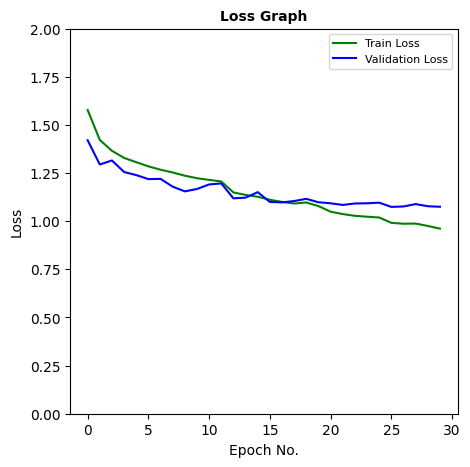

In [38]:
plt.subplots(figsize=(5, 5))
plt.plot(result.epoch, result.history["loss"], color="green", label="Train Loss")
plt.plot(result.epoch, result.history["val_loss"], color="blue", label="Validation Loss")
plt.xlabel("Epoch No.")
plt.ylabel("Loss"), plt.ylim([0, 2])
plt.legend(fontsize=8)
plt.title(f'Loss Graph', fontweight="bold", fontsize=10)
print(f'\n\n')
plt.show()
print(f'\n\n')

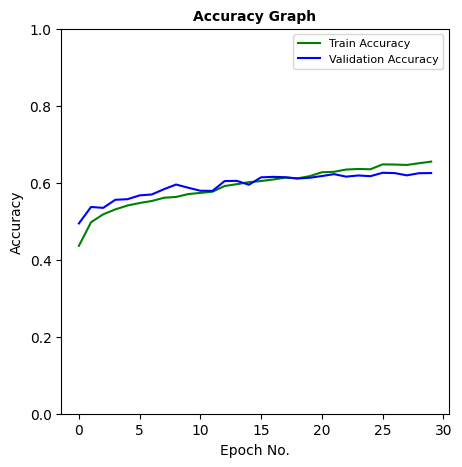

In [39]:
plt.subplots(figsize=(5, 5))
plt.plot(result.epoch, result.history["accuracy"], color="green", label="Train Accuracy")
plt.plot(result.epoch, result.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy"), plt.ylim([0, 1])
plt.legend(fontsize=8)
plt.title(f'Accuracy Graph', fontweight="bold", fontsize=10)
print(f'\n\n')
plt.show()
print(f'\n\n')

$\newline$
$\newline$
- - <a name='18'>$\small{\bf{\text{Result of Adam + SGD Optimizer}}}$</a>
$\newline$
$\newline$

In [40]:
model.compile(optimizer=optimizer_SGD, loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
tic = time()
result_final = model.fit(train_datagen.flow(x_train_scaled, y_train_scaled, batch_size=64), \
                   validation_data=(x_val_scaled, y_val_scaled), \
                   epochs=30, verbose=1, callbacks=[learning_rate_reduction])

toc = time()
run_time = (toc - tic) / 60
print(f'\n{colored("Run-time", "red", attrs=["bold"])}: {run_time: 0.3f} (min)\n')

Epoch 1/30
625/625 [==============================] - 203s 324ms/step - loss: 0.9588 - accuracy: 0.6551 - val_loss: 1.0826 - val_accuracy: 0.6263 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 206s 329ms/step - loss: 0.9582 - accuracy: 0.6575 - val_loss: 1.0760 - val_accuracy: 0.6246 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 207s 332ms/step - loss: 0.9616 - accuracy: 0.6563 - val_loss: 1.0776 - val_accuracy: 0.6260 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - ETA: 0s - loss: 0.9591 - accuracy: 0.6561
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
625/625 [==============================] - 206s 330ms/step - loss: 0.9591 - accuracy: 0.6561 - val_loss: 1.0959 - val_accuracy: 0.6186 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 207s 331ms/step - loss: 0.9528 - accuracy: 0.6595 - val_loss: 1.0755 - val_accuracy: 0.6273 - lr: 6.0000e-04
Epoch 6/30
625/625 [====================

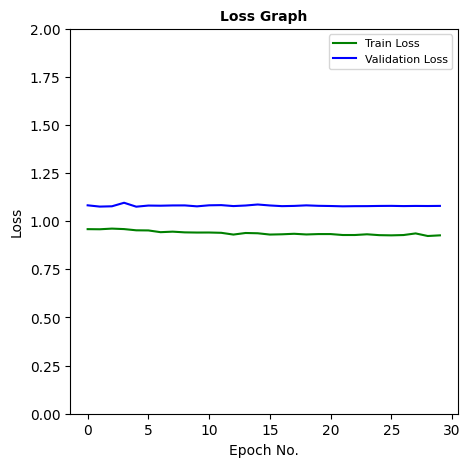

In [42]:
plt.subplots(figsize=(5, 5))
plt.plot(result_final.epoch, result_final.history["loss"], color="green", label="Train Loss")
plt.plot(result_final.epoch, result_final.history["val_loss"], color="blue", label="Validation Loss")
plt.xlabel("Epoch No.")
plt.ylabel("Loss"), plt.ylim([0, 2])
plt.legend(fontsize=8)
plt.title(f'Loss Graph', fontweight="bold", fontsize=10)
print(f'\n\n')
plt.show()
print(f'\n\n')

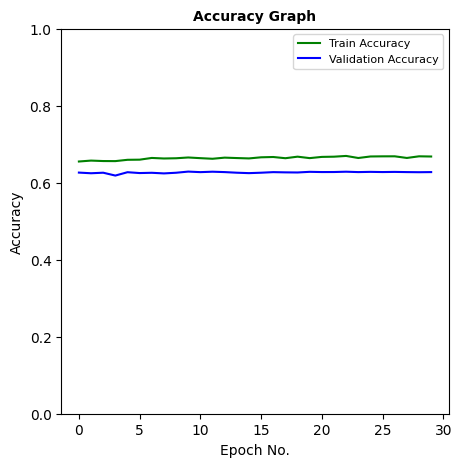

In [43]:
plt.subplots(figsize=(5, 5))
plt.plot(result_final.epoch, result_final.history["accuracy"], color="green", label="Train Accuracy")
plt.plot(result_final.epoch, result_final.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy"), plt.ylim([0, 1])
plt.legend(fontsize=8)
plt.title(f'Accuracy Graph', fontweight="bold", fontsize=10)
print(f'\n\n')
plt.show()
print(f'\n\n')

$\newline$
$\newline$
- <a name='19'>$\small{\bf{\text{Test}}}$</a>
$\newline$
$\newline$

In [44]:
tic = time()
test_result = model.evaluate(x_test_scaled, y_test_scaled)
toc = time()
test_time = toc - tic
print(f'\n{colored("test_time", "red", attrs=["bold"])}: {test_time: 0.1f}(s)\n')

313/313 [==============================] - 36s 115ms/step - loss: 1.1057 - accuracy: 0.6225

test_time:  36.3(s)



In [45]:
print(f'\n{colored("Loss", "red", attrs=["bold"])} of the Test set: \
{colored(test_result[0], "red", attrs=["bold"])}\n')
print(f'\n{colored("Accuracy", "green", attrs=["bold"])} on the Test set: \
{colored(test_result[1], "green", attrs=["bold"])}\n')


Loss of the Test set: 1.105736255645752


Accuracy on the Test set: 0.6225000023841858



In [46]:
tic = time()
y_pred = model.predict(x_test_scaled)
toc = time()
pred_time = toc - tic
print(f'\n{colored("pred_time", "red", attrs=["bold"])}: {pred_time: 0.1f}(s)\n')

313/313 [==============================] - 37s 119ms/step

pred_time:  37.9(s)



In [47]:
print(f'\nShape of X_test: {colored(x_test_scaled.shape, "blue", attrs=["bold"])}\n')
print(f'\nShape of y_pred: {colored(y_pred.shape, "blue", attrs=["bold"])}\n')


Shape of X_test: (10000, 32, 32, 3)


Shape of y_pred: (10000, 10)



In [48]:
def One_Hot_Decoder(y: np.ndarray):
    
    m = y.shape[0]
    y_out = np.zeros((m, 1), dtype=np.uint8)
    for i in range(m):
        y_out[i][0] = np.argmax(y[i])
        
    return y_out

In [49]:
y_test_decoded, y_pred_decoded = One_Hot_Decoder(y_test_scaled), One_Hot_Decoder(y_pred)

In [50]:
print(f'\nShape of {colored("y_test", "blue", attrs=["bold"])} One-Hot-Decoded: \
{colored(y_test_decoded.shape, "blue", attrs=["bold"])}\n')
print(f'\nShape of {colored("y_pred", "blue", attrs=["bold"])} One-Hot-Decoded: \
{colored(y_pred_decoded.shape, "blue", attrs=["bold"])}\n')


Shape of y_test One-Hot-Decoded: (10000, 1)


Shape of y_pred One-Hot-Decoded: (10000, 1)



$\newline$
$\newline$
- <a name='20'>$\small{\bf{\text{Confusion Matrix}}}$</a>
$\newline$
$\newline$

In [51]:
conf_mat = confusion_matrix(y_test_decoded, y_pred_decoded)

In [52]:
acc_for_each_class = conf_mat.diagonal()/conf_mat.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(0, 10), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,0,0.730
1,1,0.729
2,2,0.473
3,3,0.404
4,4,0.488
5,5,0.498
6,6,0.811
7,7,0.718
8,8,0.705
9,9,0.669


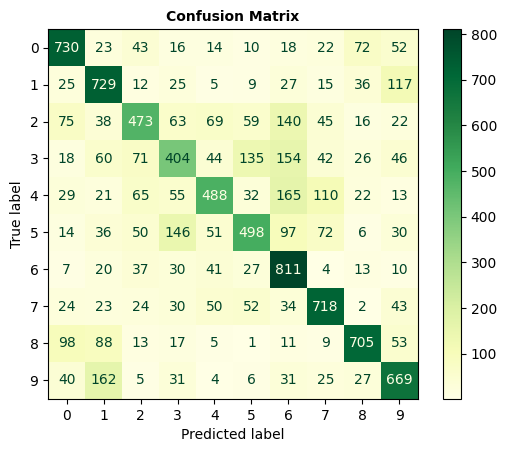

In [53]:
cmap_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', \
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',\
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=range(10))
disp.plot(cmap=cmap_list[17]), plt.title(f'Confusion Matrix', fontweight="bold", fontsize=10)
print(f'\n\n')
plt.show()
print(f'\n\n')

$\newline$
$\newline$
- <a name='21'>$\bf{\text{Conclusion:}}$</a>
$\newline$
$\newline$

$\newline$
$\newline$
- - <a name='20'>${\bf{\text{Summary of the Transfer Learning Results}}}$</a>
$\newline$
$\newline$
- - - $\bf{\color{cyan}{\text{Training Loss: }}}$ **0.9266**


- - - $\bf{\color{cyan}{\text{Validation Loss: }}}$ **1.0796**


- - - $\bf{\color{cyan}{\text{Testing Loss: }}}$ **1.105**

$\newline$
$\newline$

- - - $\bf{\color{cyan}{\text{Training Accuracy: }}}$ **0.6681**


- - - $\bf{\color{cyan}{\text{Validation Accuracy: }}}$ **0.6276**


- - - $\bf{\color{cyan}{\text{Testing Accuracy: }}}$ **0.6225**
$\newline$
$\newline$
$\newline$
$\newline$
$\newline$
$\newline$
- - - - $\text{Considering that we have used Transfer-Learning, although the accuracy of the created model is not high, but due to the use }\\ \text{of dropout and not overfitting, the generalization power of the model is high. And it may be possible to achieve better results}\\ \text{ by performing learning on all parameters of the Deep-Model}$
$\newline$
$\newline$

$\newline$
$\newline$
<a name=''>${\color{green}{\large\bf{\text{References:}}}}$</a>
$\newline$
$\newline$
- <a name=''>${\color{green}{\bf{\text{Problem 1:}}}}$</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{Covariance Matrix in Numpy}}}}$](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{TSNE in Scikit-Learn}}}}$](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{PCA in Scikit-Learn}}}}$](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{TSNE Source Code 1 @ GitHub-by-Scikit-Learn}}}}$](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/manifold/_t_sne.py)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{TSNE Source Code 2 @ GitHub}}}}$](https://github.com/beaupletga/t-SNE)</a>
$\newline$
$\newline$
- - <a name=''>[$\underline{\bf{\text{TSNE Source Code 3 @ GitHub}}}$](https://github.com/shivanichander/tSNE/blob/master/Code/tSNE%20Code.ipynb)</a>
$\newline$
$\newline$
- <a name=''>${\color{green}{\bf{\text{Problem 2:}}}}$</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{VGG19_1 @ Kaggle}}}}$](https://www.kaggle.com/code/mehmetlaudatekman/cifar-10-vgg19-transfer-learning/notebook)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{VGG19_2 @ Kaggle}}}}$](https://www.kaggle.com/code/saileshnair/transfer-learning-vgg19-cifar10)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{VGG19_1 @ GitHub}}}}$](https://github.com/rafibayer/Cifar-10-Transfer-Learning)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{VGG19_2 @ GitHub}}}}$](https://github.com/Mraghuvaran/Deep-learning-Image-transfer-learning/blob/master/CIFAR-10%20Keras%20Transfer%20Learning.ipynb)</a>
$\newline$
$\newline$
- - <a name=''>[${\underline{\bf{\text{Adam-Optimizer @ Keras}}}}$](https://keras.io/api/optimizers/)</a>
$\newline$
$\newline$